Image classification

In [1]:
# fmnist dataset image classification using CNN architecture

# import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# check the tensorflow version
print(tf.__version__)

2.15.0


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [4]:
# load the fmnist dataset

fasion_mnist = tf.keras.datasets.fashion_mnist.load_data()

# seprating the training images from the test images and labels
(train_images, train_labels), (test_images, test_labels) = fasion_mnist

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
# shape of each dataset
print("Train Images: ", train_images.shape)
print("Train Labels: ", train_labels.shape)
print("Test Images: ", test_images.shape)
print("Test Labels: ", test_labels.shape)


Train Images:  (60000, 28, 28)
Train Labels:  (60000,)
Test Images:  (10000, 28, 28)
Test Labels:  (10000,)


Text(0.5, 0, '8')

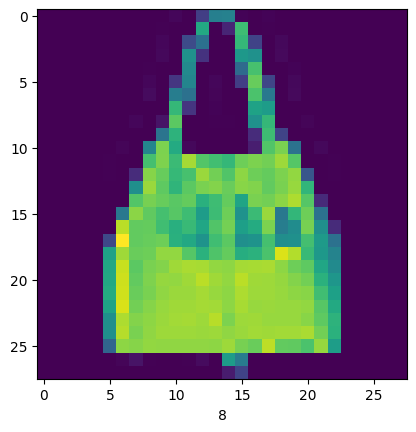

In [6]:

plt.imshow(train_images[59000])
plt.xlabel(train_labels[59000])

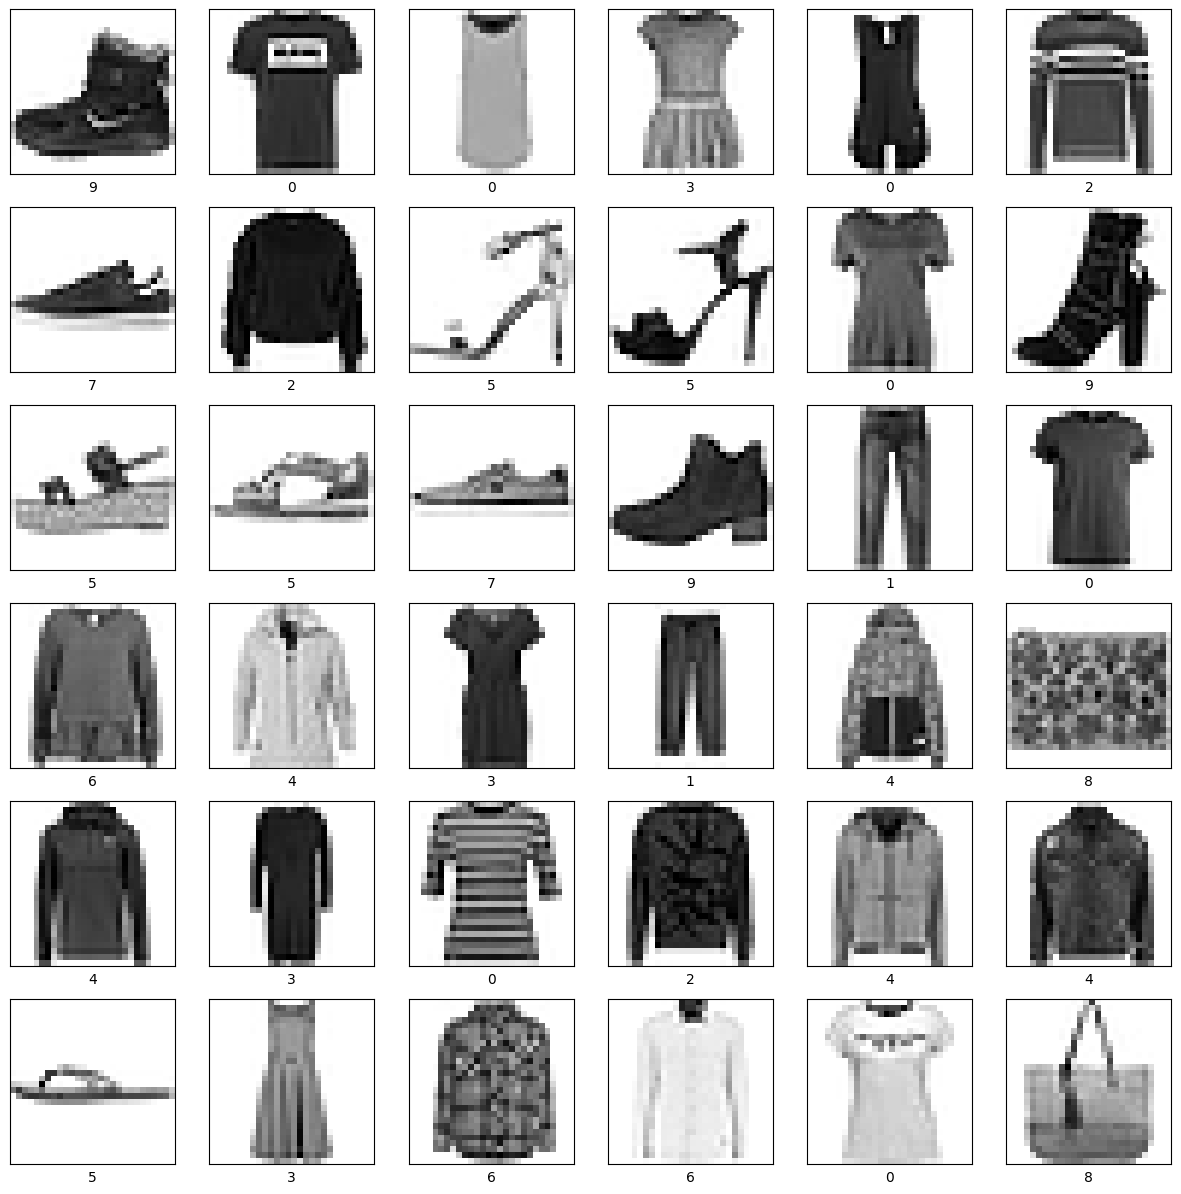

In [7]:
# Display some sample images
plt.figure(figsize=(15 , 15))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [8]:
len(train_images)


60000

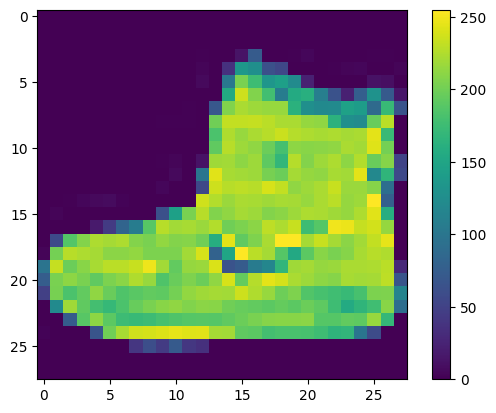

In [9]:

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
# Display the values of each pixel in the image
print("Pixel values:")
for row in train_images[0]:
    for pixel in row:
        print("{:3}".format(pixel), end=" ")
    print()

Pixel values:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3 
  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15 
  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66 
  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 223 21

In [11]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255


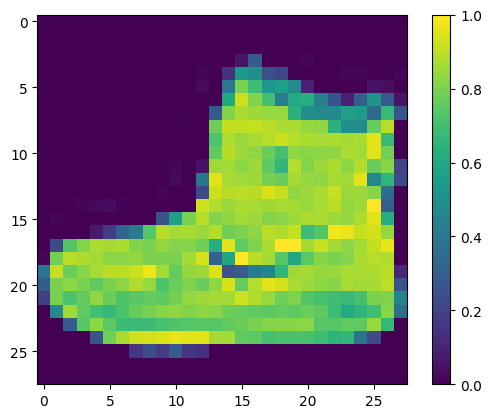

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Pixel values:
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00392 0.0 0.0 0.051 0.286 0.0 0.0 0.00392 0.0157 0.0 0.0 0.0 0.0 0.00392 0.00392 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0118 0.0 0.141 0.533 0.498 0.243 0.212 0.0 0.0 0.0 0.00392 0.0118 0.0157 0.0 0.0 0.0118 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0235 0.0 0.4 0.8 0.69 0.525 0.565 0.482 0.0902 0.0 0.0 0.0 0.0 0.0471 0.0392 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.608 0.925 0.812 0.698 0.42 0.612 0.631 0.427 0.251 0.0902 0.302 0.51 0.282 0.0588 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00392 0.0 0.271 0.812 0.875 0.855 0.847 0.847 0.639 0

<Figure size 640x480 with 0 Axes>

<Axes: >

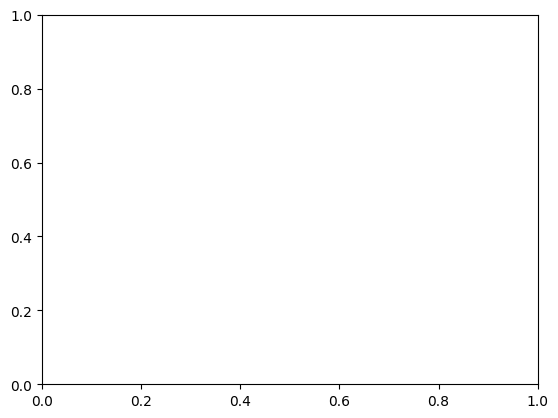

In [13]:
# Display the values of each pixel in the image
print("Pixel values:")
for row in train_images[0]:
    for pixel in row:
        print("{:0.3}".format(pixel), end=" ")
    print()
display(plt.gcf())
display(plt.gca())

In [14]:
# Reshape the images to have a channel dimension
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [15]:
# create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)), # input layer
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'), # convolutional layer
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3)), # pooling layer
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'), # convolutional layer
    tf.keras.layers.MaxPooling2D(), # pooling layer
    tf.keras.layers.Flatten(), # flatten layer
    tf.keras.layers.Dense(10, activation='softmax') # output layer
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 8, 32)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 10)                5

In [16]:
# train the model
model.fit(train_images, train_labels, epochs=20, batch_size=16, validation_split=0.2)

Epoch 1/20
3000/3000 [==============================] - 50s 16ms/step - loss: 0.5179 - accuracy: 0.8126 - val_loss: 0.4070 - val_accuracy: 0.8516
Epoch 2/20
3000/3000 [==============================] - 45s 15ms/step - loss: 0.3457 - accuracy: 0.8758 - val_loss: 0.3341 - val_accuracy: 0.8793
Epoch 3/20
3000/3000 [==============================] - 46s 15ms/step - loss: 0.3030 - accuracy: 0.8907 - val_loss: 0.3009 - val_accuracy: 0.8917
Epoch 4/20
3000/3000 [==============================] - 38s 13ms/step - loss: 0.2772 - accuracy: 0.8984 - val_loss: 0.2923 - val_accuracy: 0.8961
Epoch 5/20
3000/3000 [==============================] - 36s 12ms/step - loss: 0.2561 - accuracy: 0.9069 - val_loss: 0.2879 - val_accuracy: 0.8980
Epoch 6/20
3000/3000 [==============================] - 35s 12ms/step - loss: 0.2403 - accuracy: 0.9133 - val_loss: 0.2829 - val_accuracy: 0.8991
Epoch 7/20
3000/3000 [==============================] - 37s 12ms/step - loss: 0.2273 - accuracy: 0.9167 - val_loss: 0.2791 -

In [17]:
# model evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.3465 - accuracy: 0.8927 - 2s/epoch - 5ms/step

Test loss: 0.34651023149490356

Test accuracy: 0.8927000164985657


In [18]:
# model evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.3465 - accuracy: 0.8927 - 2s/epoch - 5ms/step

Test loss: 0.34651023149490356

Test accuracy: 0.8927000164985657


In [ ]:
# save the model
# model.save('models/fashion_mnist_model.h5')

MAKE PREDICATIONS

In [19]:
test_images.shape

(10000, 28, 28, 1)

In [20]:
predictions = model.predict(test_images)


313/313 [==============================] - 2s 6ms/step


In [21]:
test_labels[50]


4

In [22]:
predictions[0]


array([1.2951508e-10, 1.0410593e-15, 1.4487570e-15, 5.5435131e-12,
       7.2572961e-15, 4.5548152e-08, 1.0892390e-11, 5.5305190e-06,
       6.0238955e-07, 9.9999374e-01], dtype=float32)

In [23]:
np.argmax(predictions[50])


4

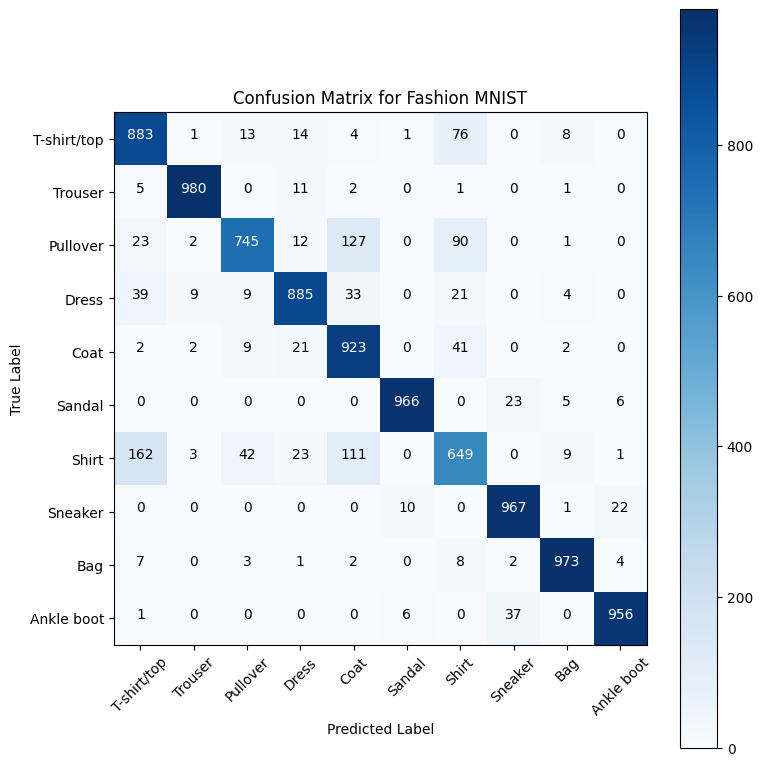

In [24]:
# draw a confusion matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have already trained your model and obtained the predicted labels and true labels
# predicted_labels and true_labels are NumPy arrays containing the predicted and true labels respectively

# Convert continuous predictions to discrete class labels
predicted_labels = np.argmax(predictions, axis=1)
# Create the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Define the class labels for Fashion MNIST (assuming there are 10 classes)
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Fashion MNIST')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add values to the confusion matrix plot
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

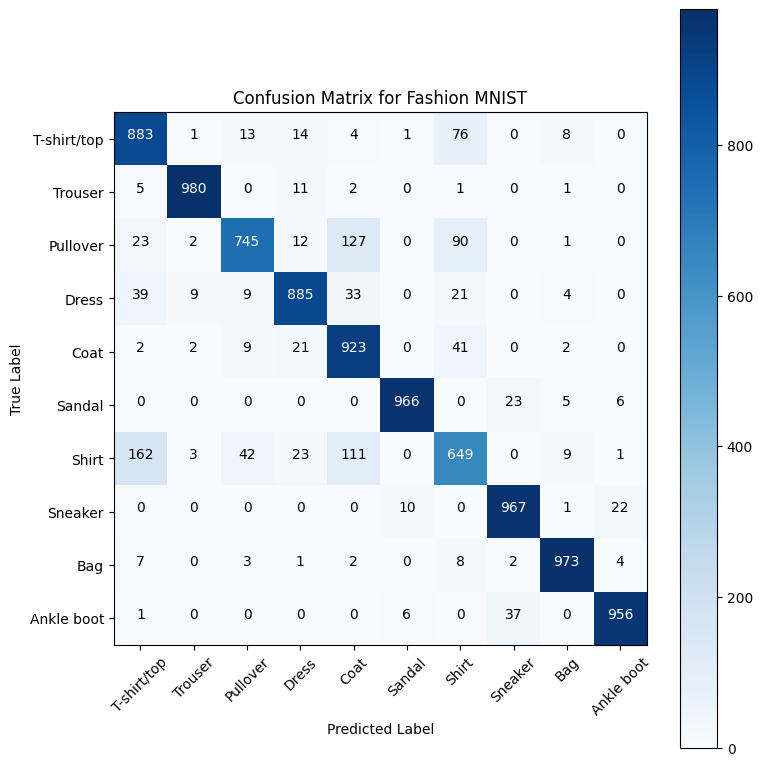

In [25]:
# draw a confusion matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have already trained your model and obtained the predicted labels and true labels
# predicted_labels and true_labels are NumPy arrays containing the predicted and true labels respectively

# Convert continuous predictions to discrete class labels
predicted_labels = np.argmax(predictions, axis=1)
# Create the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Define the class labels for Fashion MNIST (assuming there are 10 classes)
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Fashion MNIST')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add values to the confusion matrix plot
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()